In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

###  Read the column description and ensure you understand each attribute well


In [2]:
bank = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Study the data distribution in each attribute, share your findings. (5 points)

In [4]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
bank.median().transpose()

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

#Age column, experience column, family column, education columns has 1) the mean and median values are same 2) hence the ditribution is symmentric 3) zero skewness.

#Income column, CCAvg column has 1) the mean and median is separated, ( mean is moved away from median) 2) hence the distribution is non-symmentric 3) Skewness of the data moved towards right side.

#Mortgage, personal loan, securities account, cd account columns median is zero, hence that inter-quantile range also zero; which means those column values mostly contains the zero value

#online, zip code and credit card columns has no significant statistical information



### Get the target column distribution. Your comments

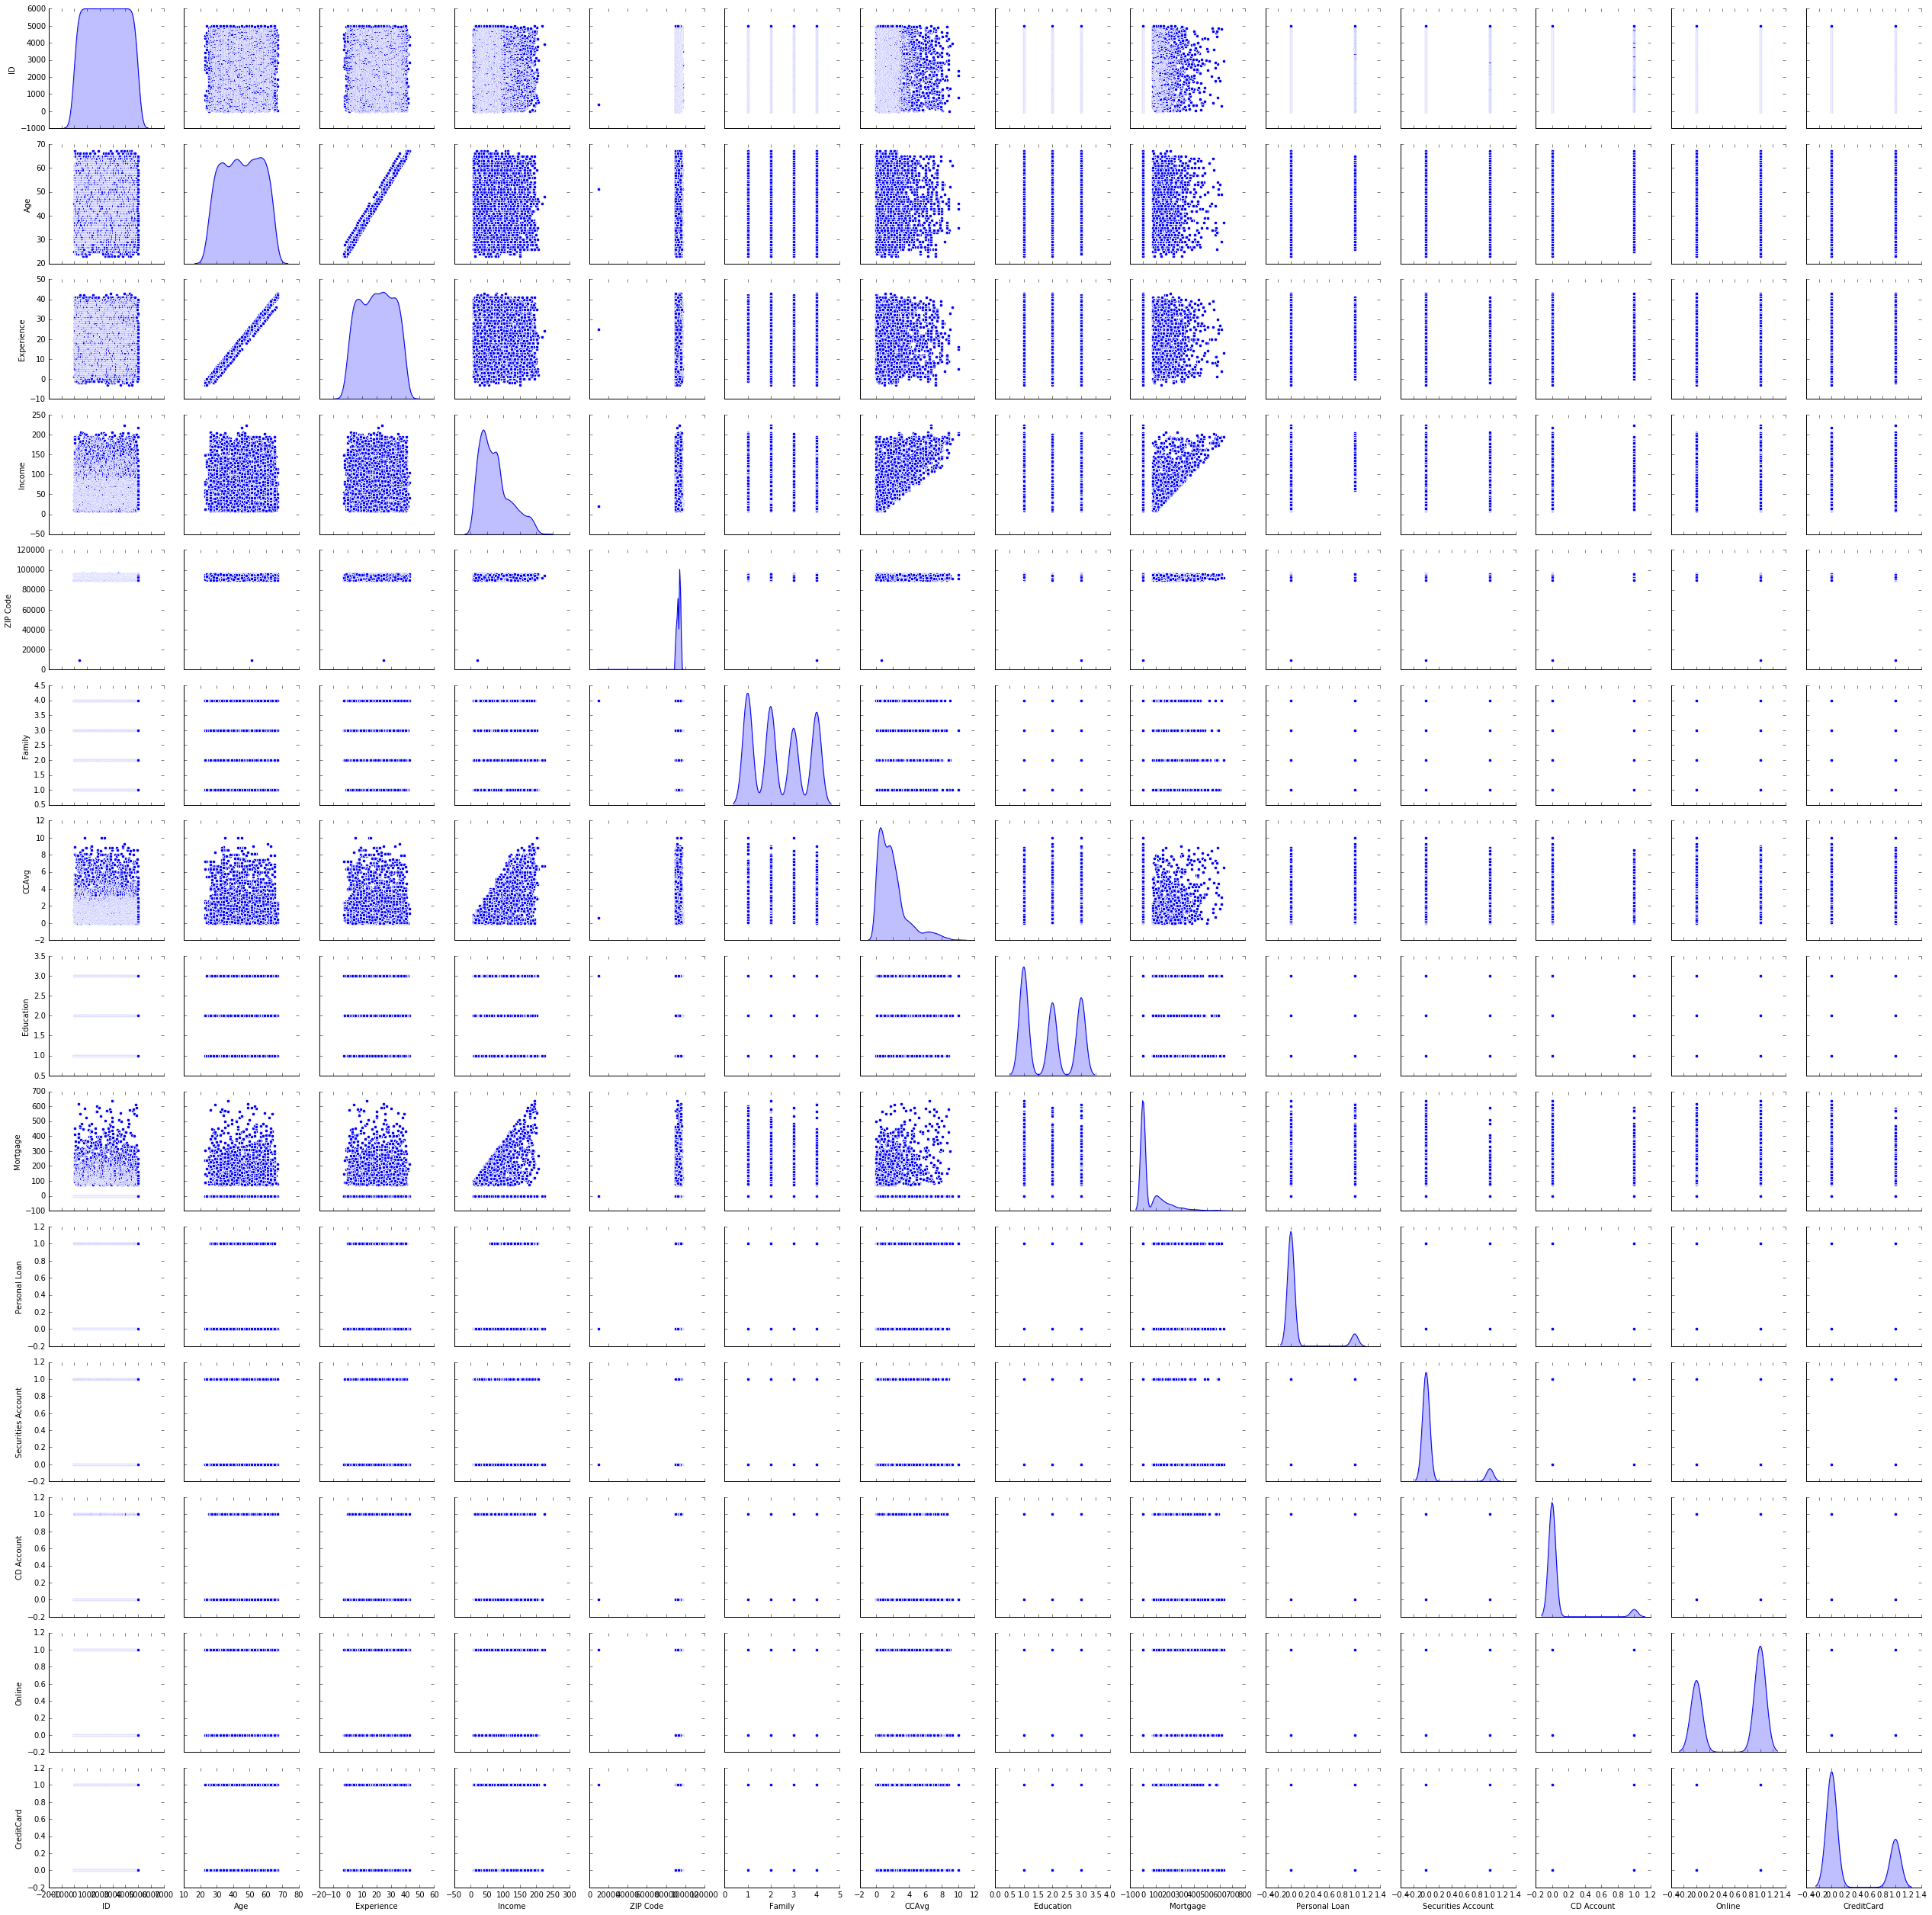

In [9]:
sns.pairplot(bank , diag_kind = "kde")

In [10]:
bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


#In pair plot and correlation values, below details are key takeaways comparing with the target column "Personal Loan"
1) ID, Age, Experience columns doesn't has the good correlation with target column as their distrubtion overlap each other and cannot differentiate.
2) Income column, CC Avg, CD Account has a good correlation with the target column.
3) Education and Mortgage column provides very little corelation with target column.

### Split the data into training and test set in the ratio of 70:30 respectively

In [11]:
from sklearn.model_selection import train_test_split
X = bank.drop(columns=['Personal Loan'],axis = 1)
Y = bank.iloc[:,9]
train_set, test_set, train_labels, test_labels = train_test_split(X, Y, test_size=0.30, random_state=1)

### Use different classification models (Logistic, Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

In [12]:
from sklearn import preprocessing
train_set_scaled = preprocessing.scale(train_set)
test_set_scaled = preprocessing.scale(test_set)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_set_scaled, train_labels)

C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
print(model.score(train_set_scaled,train_labels))
print(model.score(test_set_scaled,test_labels))

0.9528571428571428
0.9473333333333334


In [15]:
y_pred = model.predict(test_set_scaled)

In [16]:
from sklearn.naive_bayes import GaussianNB
nv_gnb_model = GaussianNB()
nv_gnb_model.fit(train_set_scaled,train_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
print(nv_gnb_model.score(train_set_scaled,train_labels))
print(nv_gnb_model.score(test_set_scaled,test_labels))

0.8894285714285715
0.8686666666666667


In [18]:
y_predict_nb = nv_gnb_model.predict(test_set_scaled)

### K Nearest Neighbor

In [25]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(train_set_scaled, train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [27]:
print(NNH.score(train_set_scaled,train_labels))
print(NNH.score(test_set_scaled,test_labels))

1.0
0.9453333333333334


In [28]:
y_pred_nnh = NNH.predict(test_set_scaled)

# Print the confusion matrix for all the above models (5 points)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print("Confusion Matrix :: Logistic Regression")
metrics.confusion_matrix(test_labels,y_pred)

Confusion Matrix :: Logistic Regression


array([[1333,   18],
       [  61,   88]], dtype=int64)

In [20]:
print("Confusion Matrix :: Naïve Bayes")
metrics.confusion_matrix(test_labels,y_predict_nb)

Confusion Matrix :: Naïve Bayes


array([[1225,  126],
       [  71,   78]], dtype=int64)

In [29]:
print("Confusion Matrix :: KNN")
metrics.confusion_matrix(test_labels,y_pred_nnh)

Confusion Matrix :: KNN


array([[1341,   10],
       [  72,   77]], dtype=int64)

###  Give your reasoning on which is the best model in this case and why it performs better? (5 points)

#### KNN performs better here 
#### Reasons are
1. Clearly it shows when comparing with test scores and confustion matrix
2. Naive bias uses predicting variable independent of each other but the current data set doesn't fit with this criteria
3. Naive bias model perform well on dataset which has more bias but current dataset does not support the same
